# FINAL PROJECT

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
match_details = pd.read_csv('Match.csv')
match_details = match_details.dropna(subset=['Toss_Winner', 'match_winner'])

overs_details = pd.read_csv('Ball_By_Ball.csv')
over_details_death = overs_details[overs_details['Over_id'] > 16]

player = pd.read_csv('Player.csv', encoding='unicode_escape')

team_details = pd.read_csv('Team.csv', encoding='unicode_escape')

players_age = pd.read_csv('Player_match.csv', encoding='unicode_escape')

winners = pd.read_csv('Winners.csv')

## Hypothesis 1: Event of winning the toss is positively correlated with the event of a team winning the game

In [3]:
def match_results(df):
    """
    This function return number of wins and loses of the team that won the toss at the beginning of match.
    :param df: the dataframe that contains 'toss_winner' and 'match_winner' columns
    :return: a tuple containing number of wins and losses of team winning the toss

    >>> print(match_results(match_details))
    (324, 309)
    """
    won = 0
    for index, row in df.iterrows():
        if row['Toss_Winner'] == row['match_winner']:
            won += 1

    loss = len(match_details) - won
    return won, loss

In [4]:
match_results(match_details)

(324, 309)

In [5]:
def bar_plot1(value1, value2, x_axis, y_axis, title):
    """
    This function creates a bar plot after creating a dataframe with the values stored.
    :param value1: the label of the first bar
    :param value2: the label of the second bar
    :param x_axis: the x-axis label
    :param y_axis: the y-axis label
    :param title: the title of the plot
    :return: a plot with the entered parameters
    """
    df_temp = pd.DataFrame({x_axis: [value1, value2], y_axis: match_results(match_details)})
    plt.bar(df_temp[x_axis], height=df_temp[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

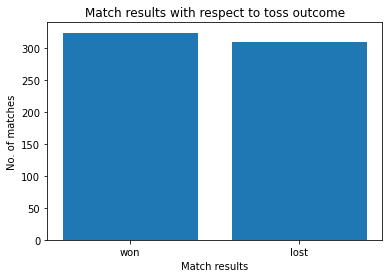

In [6]:
bar_plot1('won', 'lost', 'Match results', 'No. of matches', 'Match results with respect to toss outcome')

### Conclusion:
From the given plot we can see that the bar "Won" which depicts the number of times team has won the match after winning the toss is similar to the bar "Lost" which depicts the number of times team has won the match after lossing the toss. Hence, we see that there is no such trend and hence we reject the hypothesis.

## Hypothesis 2: Fast bowlers are more effective than spinners during death overs. (Death over – Last 4 overs of the innings)

In [7]:
fast_bowlers = player[(player['Bowling_skill']=='Right-arm medium')|(player['Bowling_skill']=='Right-arm fast-medium')|(player['Bowling_skill']=='Right-arm medium-fast')|(player['Bowling_skill']=='Left-arm fast-medium')|(player['Bowling_skill']=='Left-arm medium-fast')|(player['Bowling_skill']=='Right-arm fast')|(player['Bowling_skill']=='Left-arm fast')|(player['Bowling_skill']=='Left-arm medium')|(player['Bowling_skill']=='Right-arm medium fast')|(player['Bowling_skill']=='\xa0Right-arm fast-medium')|(player['Bowling_skill']=='\xa0Right-arm medium-fast')|(player['Bowling_skill']=='\xa0Left-arm fast')]

In [8]:
slow_bowlers = player[(player['Bowling_skill']=='Right-arm offbreak')|(player['Bowling_skill']=='Legbreak googly')|(player['Bowling_skill']=='Slow left-arm orthodox')|(player['Bowling_skill']=='Slow left-arm chinaman')|(player['Bowling_skill']=='Legbreak')|(player['Bowling_skill']=='Right-arm bowler')|(player['Bowling_skill']=='\xa0Legbreak')|(player['Bowling_skill']=='\xa0Right-arm offbreak')]

In [9]:
def economy_rate(bowlers):
    """
    This function will return the economy rate of bowlers data passed through function.
    :param bowlers: it is a subset of the 'players' dataframe containing specific bowling players
    :return: a float value which represents economy rate of set of players passed initially

    >>> print(economy_rate(fast_bowlers))
    9.292946530147896
    """
    merged_data = pd.merge(over_details_death, bowlers, how='inner', left_on=['BOWLER_SK'], right_on=['PLAYER_SK'])
    pivot_data = pd.pivot_table(merged_data, index=['MatcH_id', 'Innings_No'], columns='Over_id', values='Runs_Scored',
                                aggfunc='sum', fill_value=0)
    total_overs = 0
    total_runs = 0
    for i in range(0, len(pivot_data)):
        for j in pivot_data.values[i]:
            total_runs = total_runs + j
            if j != 0:
                total_overs += 1
    economy = total_runs / total_overs
    return economy

In [10]:
def bar_plot2(value1, value2, x_axis, y_axis, title):
    """
    This function creates a bar plot after creating a dataframe with the values stored.
    :param value1: the label of the first bar
    :param value2: the label of the second bar
    :param x_axis: the x-axis label
    :param y_axis: the y-axis label
    :param title: the title of the plot
    :return: a plot with the entered parameters
    """
    df_temp = pd.DataFrame({x_axis: [value1, value2], y_axis: [economy_rate(fast_bowlers), economy_rate(slow_bowlers)]})
    plt.bar(df_temp[x_axis], height=df_temp[y_axis])
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

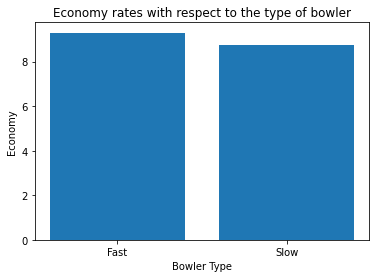

The economy rate of fast bowlers is 9.292946530147896 and that for spinners is 8.75784190715182


In [11]:
bar_plot2('Fast', 'Slow', 'Bowler Type', 'Economy', 'Economy rates with respect to the type of bowler')
print("The economy rate of fast bowlers is {} and that for spinners is {}".format(economy_rate(fast_bowlers), economy_rate(slow_bowlers)))

### Conclusion:
Here we can see that fast bowlers have a higher economy rate as compared to spinners, hence we reject the hypothesis as spinners which have a lower economy rate are more effective. Hence, from the above graph we can see that spinners are more effective as compared to fast bowlers during death overs.